<a href="https://colab.research.google.com/github/rohailkhan/Aj_Machine_learning_master/blob/main/Iris_dataset_ML_modelling.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [42]:
import pandas as pd
import numpy as np

In [43]:
from matplotlib import pyplot
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

In [44]:
filename='https://raw.githubusercontent.com/rohailkhan/data/main/iris.csv'


In [45]:
names = ['sepal-length', 'sepal-width', 'petal-length', 'petal-width', 'class']
dataset = pd.read_csv(filename, names=names)
dataset.head(3)

,sepal-length,sepal-width,petal-length,petal-width,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa


In [46]:
dataset.describe()

,sepal-length,sepal-width,petal-length,petal-width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [47]:
dataset.shape

(150, 5)

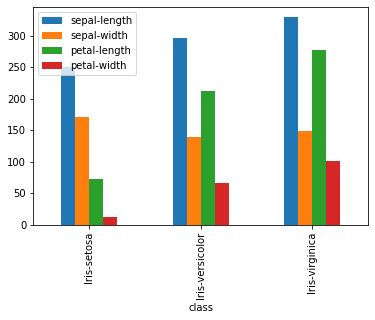

In [48]:
dataset.groupby('class').sum().plot(kind='bar')
pyplot.show()

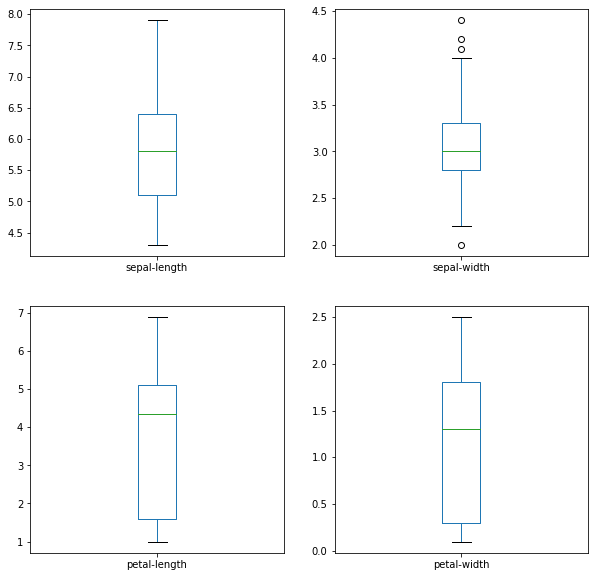

In [49]:
dataset.plot(kind='box', subplots=True, layout=(2,2), sharex=False, sharey=False,figsize=(10,10))
pyplot.show()

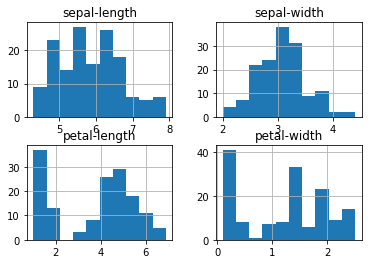

In [50]:
data=dataset
data.hist()
plt.show()

In [54]:
X=(data.iloc[:,0:4])
Y=(data.iloc[:,4])

In [60]:
X=np.array(X)
Y=np.array(Y)

In [61]:
X_train, X_validation, Y_train, Y_validation = train_test_split(X, Y,
test_size=0.2, random_state=7)

In [62]:
km=KNeighborsClassifier()
km.fit(X_train,Y_train)

KNeighborsClassifier()

In [63]:
km.score(X_validation,Y_validation)

0.9

In [64]:

models = []
models.append(('LR', LogisticRegression()))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))
models.append(('SVM', SVC()))
results=[]
names=[]

In [69]:
for name,model in models:
  
  kfold=KFold(n_splits=5,random_state=10,shuffle=True)
  cv_results=cross_val_score(model,X_train,Y_train,cv=kfold,scoring='accuracy')
  results.append(cv_results)
  names.append(name)
  msg=" %s: %0.3f (%0.3f)"%(name,cv_results.mean(),cv_results.std())
  print(msg)



 LR: 0.992 (0.017)
 LDA: 0.983 (0.020)
 KNN: 0.992 (0.017)
 CART: 0.958 (0.046)
 NB: 0.975 (0.020)
 SVM: 0.992 (0.017)


# Pleminary results
KNN is selected
# Predictions by  KNN model

In [90]:
knn=KNeighborsClassifier()
knn.fit(X_train,Y_train)

KNeighborsClassifier()

In [91]:
predictions=knn.predict(X_validation)
print(accuracy_score(Y_validation,predictions))
print(confusion_matrix(Y_validation, predictions))

0.9
[[ 7  0  0]
 [ 0 12  0]
 [ 0  3  8]]


In [92]:
print(classification_report(Y_validation, predictions))

                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00         7
Iris-versicolor       0.80      1.00      0.89        12
 Iris-virginica       1.00      0.73      0.84        11

       accuracy                           0.90        30
      macro avg       0.93      0.91      0.91        30
   weighted avg       0.92      0.90      0.90        30



In [93]:
# improving
from sklearn.preprocessing import Normalizer
norm=Normalizer()
norm.fit(X)

Normalizer()

In [77]:
X.mean() , X.std()

(3.4636666666666662, 1.974000985027335)

In [94]:
Xn=norm.transform(X)

In [79]:
Xn.mean() , Xn.std()

(0.43808094463237096, 0.2410084769256249)

In [95]:
X_train, X_validation, Y_train, Y_validation = train_test_split(Xn, Y,
test_size=0.2, random_state=7)

In [96]:
knn=KNeighborsClassifier()
knn.fit(X_train,Y_train)

predictions=knn.predict(X_validation)
print(accuracy_score(Y_validation,predictions))
print(confusion_matrix(Y_validation, predictions))

print(classification_report(Y_validation, predictions))

0.9333333333333333
[[ 7  0  0]
 [ 0 10  2]
 [ 0  0 11]]
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00         7
Iris-versicolor       1.00      0.83      0.91        12
 Iris-virginica       0.85      1.00      0.92        11

       accuracy                           0.93        30
      macro avg       0.95      0.94      0.94        30
   weighted avg       0.94      0.93      0.93        30



## Result of Normalization
### The accuracy increased from 93 to 95



In [97]:
from sklearn.preprocessing import StandardScaler
st=StandardScaler()
st.fit(X)
Xt=st.transform(X)

In [98]:
X_train, X_validation, Y_train, Y_validation = train_test_split(Xt, Y,
test_size=0.2, random_state=7)

In [99]:
knn=KNeighborsClassifier()
knn.fit(X_train,Y_train)

predictions=knn.predict(X_validation)
print(accuracy_score(Y_validation,predictions))
print(confusion_matrix(Y_validation, predictions))

print(classification_report(Y_validation, predictions))

0.9
[[ 7  0  0]
 [ 0 12  0]
 [ 0  3  8]]
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00         7
Iris-versicolor       0.80      1.00      0.89        12
 Iris-virginica       1.00      0.73      0.84        11

       accuracy                           0.90        30
      macro avg       0.93      0.91      0.91        30
   weighted avg       0.92      0.90      0.90        30



## Result of Standardization
### The accuracy remains 93